# #  Обычные пожары

In [7]:
# Подключение модулей
import pandas as pd, numpy as np
import pyodbc as sqlMS # связь с Access
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import pickle
import FireAnalysis as F

# Данный фрагмент кода работает только при наличии на компьютере исходной базы данных.
# Все необходимые для анализа данные, приведенные в статье хранятся в прилагаемом файле BF_Region.pkl
# Создание связи с БД "Пожары"
# connStr = (r"DRIVER={Microsoft Access Driver (*.mdb, *.accdb)};" r"DBQ=D:\FR\FR.accdb;")
# conn = sqlMS.connect(connStr) # создать соединение с БД
# cursor = conn.cursor()

def AllFr(Yr):  # Запрос к БД Access - все пожары, где привлекались оперативные подразделения
    strSQL = f'''
    SELECT FR{Yr}.F0, Year(FR{Yr}.F5) AS YR,  FR{Yr}.F1, 60*([F159]-[F63])+([F160]-[F64])+1440*([F71]-[F5]) AS Tm, [F83]+[F84]+[F85]+[F86]+[F87] AS Tex, [F91]+[F92]+[F93] AS Stv, [F43]+[F44] AS S, FR{Yr}.F12
    FROM FR{Yr}
    WHERE (((60*([F159]-[F63])+([F160]-[F64])+1440*([F71]-[F5]))>9) AND (([F83]+[F84]+[F85]+[F86]+[F87])>0) AND (([F91]+[F92]+[F93])>0) AND (([F43]+[F44])>1) AND ((FR{Yr}.F4)=0));
    '''
    return pd.read_sql(strSQL, conn)

def koeff_A(x1, y1, x2, y2):  #  коэффициент A
    res = (-x1*x2*(y1-y2)) / (x1-x2)
    return(res)

def koeff_B(x1, y1, x2, y2):  #  коэффициент B
    res = (x1*y1-x2*y2) / (x1-x2)
    return(res)

In [6]:
df = AllFr(2010)
for i in range(2011, 2022):
    df1 = AllFr(i)
    df = df.append(df1, ignore_index=True)  # присоединть df1 к df0 и обновить индексы

#  Закрыть соединение с базой Access
cursor.close()
del cursor
conn.close()  

mask = (df.Tm < 0) 
df.loc[mask, 'Tm'] = df.Tm + 1440

df = df.dropna()  # удалить NaN
df = df.astype(int, errors='ignore')  # преобразовать весь фрейм до целого

df.to_pickle('pkl/All_FR.pkl')  # сохранить фрейм в файл pikle

In [2]:
df = pd.read_pickle('pkl/All_FR.pkl')
df # Выборка

,F0,YR,F1,Tm,Tex,Stv,S,F12
0,63909,2010,1111,64,5,4,50,275
1,63910,2010,1111,127,2,1,120,282
2,29,2010,111,30,4,3,10,0
3,30,2010,111,239,1,3,50,0
4,36,2010,111,105,6,4,350,136
...,...,...,...,...,...,...,...,...
2110723,1513936,2021,1188,104,7,3,300,110
2110724,1513937,2021,1188,35,3,2,70,283
2110725,1513940,2021,1188,57,5,5,300,283
2110726,1513943,2021,1188,12,1,1,2,69


In [6]:
df.iloc[:,2:6].describe()  # Общая описательная статистика для выбранных столбцов

,F1,Tm,Tex,Stv
count,2.110759e+06,2.110759e+06,2.110759e+06,2.110759e+06
mean,1.146037e+03,8.419924e+01,2.155921e+00,1.597166e+00
std,4.703142e+02,2.723866e+03,1.655317e+00,1.067342e+00
min,1.110000e+02,1.000000e+01,1.000000e+00,1.000000e+00
25%,1.118000e+03,2.400000e+01,1.000000e+00,1.000000e+00
50%,1.146000e+03,4.200000e+01,2.000000e+00,1.000000e+00
75%,1.165000e+03,8.200000e+01,3.000000e+00,2.000000e+00
max,8.888000e+03,2.630898e+06,1.170000e+02,1.000000e+02


In [8]:
print('Наиболее продолжительные пожары:')
df.sort_values(by='Tm', ascending=False).head()

Наиболее продолжительные пожары:


,F0,YR,F1,Tm,Tex,Stv,S,F12
1205152,120730,2019,1166,8389,11,4,700,377
2108787,1511528,2021,1165,7805,6,6,53000,383
2029597,1411366,2021,1153,7743,12,10,999999,65
62586,319826,2010,1168,7441,3,1,103,282
1358203,314477,2019,1104,7395,2,5,1100,371
593554,499993,2014,1174,7281,2,2,60,398
89586,462659,2010,1141,7254,1,1,2,511
2026062,1407345,2021,1191,7253,1,1,80,371
372345,2625835,2012,1174,7248,1,1,60,282
278942,2243701,2012,1184,7241,2,1,10,274


In [9]:
print('Пожары, потушенные с привлечением наибольшего количества пожарной техники:')
df.sort_values(by='Tex', ascending=False).head()

Пожары, потушенные с привлечением наибольшего количества пожарной техники:


,F0,YR,F1,Tm,Tex,Stv,S,F12
79639,410034,2010,1101,4370,117,84,18048,282
1951093,1306867,2021,141,6260,102,93,10100,112
732018,5516472,2015,1145,415,92,7,200,263
1375856,335248,2019,1157,77,80,2,50,283
1297767,240463,2019,1125,1010,77,4,2700,65


In [7]:
print('Пожары, потушенные с подачей наибольшего количества стволов:')
df.sort_values(by='Stv', ascending=False).head()

Пожары, потушенные с подачей наибольшего количества стволов:


,F0,F1,Tm,Tex,Stv,S,F12
1167927,1412497,1120,2135,35,100,42000,161
1951115,1306867,141,6260,102,93,10100,112
79642,410034,1101,4370,117,84,18048,282
679812,5327906,1161,198,4,64,108,283
231584,2194841,1165,16,1,58,2,402


In [8]:
print('Пожары с наибольшей площадью:')
df.sort_values(by='S', ascending=False).head()

Пожары с наибольшей площадью:


,F0,F1,Tm,Tex,Stv,S,F12
1196142,1445386,1160,298,16,8,1999998,356
1446348,1757712,1122,437,20,8,1999998,65
1525025,62712,1160,1136,17,5,1999998,65
1528263,66267,1160,56,16,3,1999998,356
1446464,1757834,1122,441,13,7,1700000,65


# # Частоты распределения показателей

In [10]:
# Распределение частот интервалов времени занятости
dfTm = pd.DataFrame(df.Tm.value_counts().sort_index(ascending=True))
S = dfTm['Tm'].sum()
dfTm['Fraction'] = dfTm.Tm /S * 100

# Распределение частот пожаров по количеству техники
dfTex = pd.DataFrame(df.Tex.value_counts().sort_index(ascending=True))
S = dfTex.Tex.sum()
dfTex['Fraction'] = dfTex.Tex /S * 100

# Распределение частот пожаров по количеству стволов
dfStv = pd.DataFrame(df.Stv.value_counts().sort_index(ascending=True))
S = dfStv.Stv.sum()
dfStv['Fraction'] = dfStv.Stv /S * 100

with pd.ExcelWriter('pkl/Fraction_All.xlsx') as writer:  # Запись в книгу Excel
    dfTm.to_excel(writer, sheet_name='Tm')
    dfTex.to_excel(writer, sheet_name='Tex')
    dfStv.to_excel(writer, sheet_name='Stv')

# #Оценка ядерной плотности распределений

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


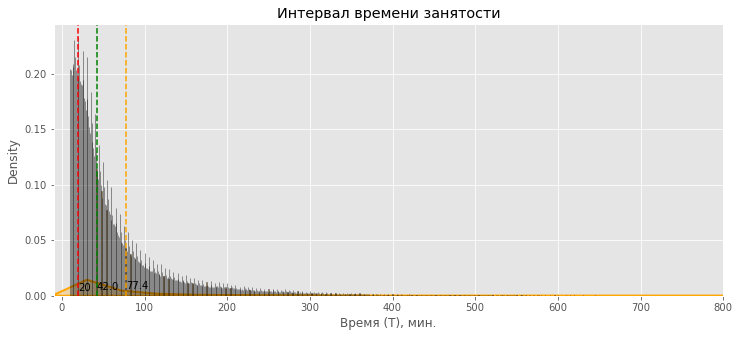

In [11]:
matplotlib.style.use('ggplot')
DD = df.Tm  # Интервал времени занятости
fig, ax = plt.subplots(figsize=(12,5))

ax.set(xlim = [-10, 800],  title = 'Интервал времени занятости')

sns.distplot(DD, hist=True, kde = True, kde_kws = {'shade' : True , 'linewidth' : 2 }, label = 'Normal', color = 'orange',
            bins=100000, axlabel='Время (Т), мин.', hist_kws = {'edgecolor': 'black', 'linewidth': 1})
        # bins - параметр ширины столбцов

# Вертикальные линии и подписи
def vline(x, y, col):
    plt.axvline(x, color=col, linestyle='dashed', linewidth=1.5) 
    plt.text(x, y, round(x,1), color='black')
    
yv = 0.0065 # положение подписи по оси Y 
vline(DD.mean(), yv, 'orange')
vline(DD.median(), yv-0.001, 'green')
vline(DD.mode()[0], yv-0.002, 'red')

fig.savefig('img/img-Tm_All', dpi=300, bbox_inches = 'tight')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


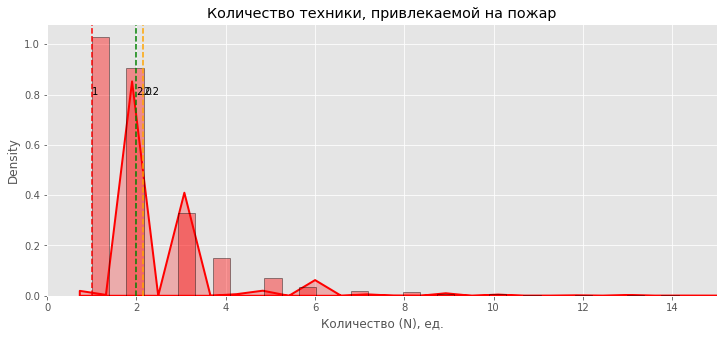

In [22]:
DD = df.Tex  # Количество техники, привлекаемой на пожар
fig, ax = plt.subplots(figsize=(12,5))

ax.set(xlim = [0, 30], title = 'Количество техники, привлекаемой на пожар')

sns.distplot(DD, hist=True, kde = True, kde_kws = {'shade' : True , 'linewidth' : 2 }, label = 'Normal', color = 'red',
            bins=300, axlabel='Количество (N), ед.', hist_kws = {'edgecolor': 'black', 'linewidth': 1})

# Вертикальные линии и подписи
def vline(x, y, col):
    plt.axvline(x, color=col, linestyle='dashed', linewidth=1.5) 
    plt.text(x, y, round(x,1), color='black')
    
yv = 1.1 # положение подписи по оси Y 
vline(DD.mean(), yv, 'orange')
vline(DD.median(), yv-0.1, 'green')
vline(DD.mode()[0], yv-0.2, 'red')

fig.savefig('img/img-Tex_All', dpi=300, bbox_inches = 'tight')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


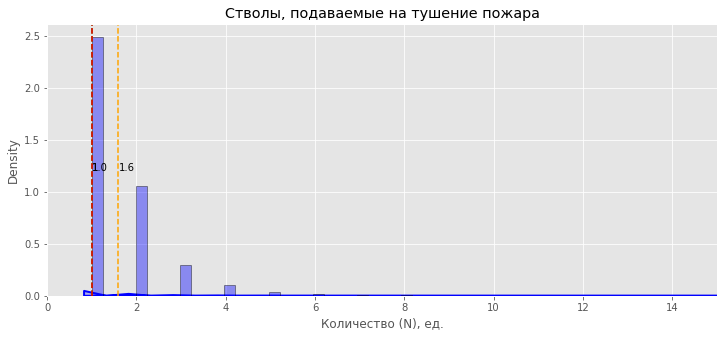

In [24]:
DD = df.Stv  # Стволы, подаваемые на тушение пожара
fig, ax = plt.subplots(figsize=(12,5))

ax.set(xlim = [0, 15], title = 'Стволы, подаваемые на тушение пожара')

sns.distplot(DD, hist=True, kde = True, kde_kws = {'shade' : True , 'linewidth' : 2 }, label = 'Normal1', color = 'blue',
            bins=400, axlabel='Количество (N), ед.', hist_kws = {'edgecolor': 'black', 'linewidth': 1})

# Вертикальные линии и подписи
def vline(x, y, col):
    plt.axvline(x, color=col, linestyle='dashed', linewidth=1.5) 
    plt.text(x, y, round(x,1), color='black')
    
yv = 1.2 # положение подписи по оси Y 
vline(DD.mean(), yv, 'orange')
vline(DD.median(), yv, 'green')
vline(DD.mode()[0], yv, 'red') 

fig.savefig('img/img-Stv_All', dpi=300, bbox_inches = 'tight')

## Оценка максимальных показателей {Тзн, Nт и Nств} по регионам РФ 

In [3]:
# Коды объектов пожара - здания
obj = [85,87,88,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,118,119,120,121,122,123,124,125,126,127,128,129,
       130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,
       165,166,167,168,169,171,172,176,177,178,191,192,211,212,213,214,218,219,220,231,232,233,234,236,237,238,239,240,241,242,
       243,244,245,246,249,250,251,252,253,254,256,258,259,260,261,262,263,264,265,266,272,273,274,275,276,282,283,284,285,286,
       288,299,300,301,302,303,304,305,306,307,308,309,351,352,353,359,360,361,364,365,366,398,399,501,502,503,504,505,506,507,
       508,509,510,511,512,513,514,515,516,517,519,520,521,522,523,524,525,526]

df1 = df[df.F12.isin(obj)]  # Пожары в зданиях

agg_func_math = {
#  количество значений, среднее арифметическое, медиана, стандартное отклонение, минимум и максимум
    'Tm':  ['count', 'mean', 'median', 'std', 'min', 'max'],
    'Tex': ['mean', 'median', 'std', 'min', 'max'],
    'Stv': ['mean', 'median', 'std', 'min', 'max']
}
dTm = df1.groupby('F1').agg(agg_func_math).round(2)

dTm['Reg'] = dTm.index  # Создать новый столбец с кодами регионов - копированием индексов
dTm = dTm.reset_index(drop=True)  # Обновление индексов

dTm

Tm                                    Tex                         Stv  \
    count    mean median     std min   max  mean median   std min  max  mean   
0     362   99.62   45.0  170.12  10  1697  2.23    2.0  1.42   1   11  2.39   
1   15423   98.82   31.0  255.12  10  6260  3.48    3.0  3.40   1  102  1.86   
2   16006   75.19   49.0  111.60  10  2936  3.31    3.0  1.93   1   41  2.22   
3    4350   68.27   35.0  136.31  10  3452  4.22    3.0  2.69   1   33  2.76   
4   34922   61.89   44.0   89.61  10  4370  2.56    2.0  1.50   1  117  1.78   
..    ...     ...    ...     ...  ..   ...   ...    ...   ...  ..  ...   ...   
81   3840   35.59   26.0  132.72  10  7226  1.62    1.0  1.19   1   22  1.76   
82   9578   69.71   44.5   90.20  10  1619  3.13    3.0  1.61   1   23  1.98   
83  12431   80.40   49.0  130.17  10  4355  2.92    2.0  2.52   1   61  2.23   
84   3190  104.44   55.0  143.21  10  1720  1.77    2.0  0.91   1   16  1.58   
85   5258   85.84   54.0  129.16  10  4519  3.39    3.0  2.08   1   35  1.97   

                          Reg  
   median   std min max        
0     2.0  1.86   1  20   111  
1     1.0  2.00   1  93   141  
2     2.0  1.43   1  21   171  
3     2.0  2.11   1  17   172  
4     2.0  1.07   1  84  1101  
..    ...   ...  ..  ..   ...  
81    1.0  1.17   1  20  1196  
82    2.0  1.03   1  14  1197  
83    2.0  1.50   1  22  1198  
84    1.0  0.81   1  11  1199  
85    2.0  1.39   1  31  8888  

[86 rows x 17 columns]

In [5]:
# Показатели из фрейма dTm


m, n = dTm.Tm['max'].max(), dTm.Tm['max'].min()
rm, rn = int(dTm.Reg[dTm.Tm['max'] == m]), int(dTm.Reg[dTm.Tm['max'] == n])
print(f'Диапазон максимальных значений Tm.max: {n} - {m}. Регионы: {F.RegionName(rn)} и {F.RegionName(rm)}')

m, n = dTm.Tex['max'].max(), dTm.Tex['max'].min()
rm, rn = int(dTm.Reg[dTm.Tex['max'] == m]), int(dTm.Reg[dTm.Tex['max'] == n])
print(f'Диапазон максимальных значений Tex.max: {n} - {m}. Регионы: {F.RegionName(rn)} и {F.RegionName(rm)}')

m, n = dTm.Stv['max'].max(), dTm.Stv['max'].min()
rm, rn = int(dTm.Reg[dTm.Stv['max'] == m]), int(dTm.Reg[dTm.Stv['max'] == n])
print(f'Диапазон максимальных значений Stv.max: {n} - {m}. Регионы: {F.RegionName(rn)} и {F.RegionName(rm)}')

Диапазон максимальных значений Tm.max: 1528 - 7441. Регионы: Калужская обл. и Тамбовская обл.
Диапазон максимальных значений Tex.max: 7 - 117. Регионы: Чукотский авт. округ и Алтайский край
Диапазон максимальных значений Stv.max: 8 - 100. Регионы: Чукотский авт. округ и Воронежская обл.


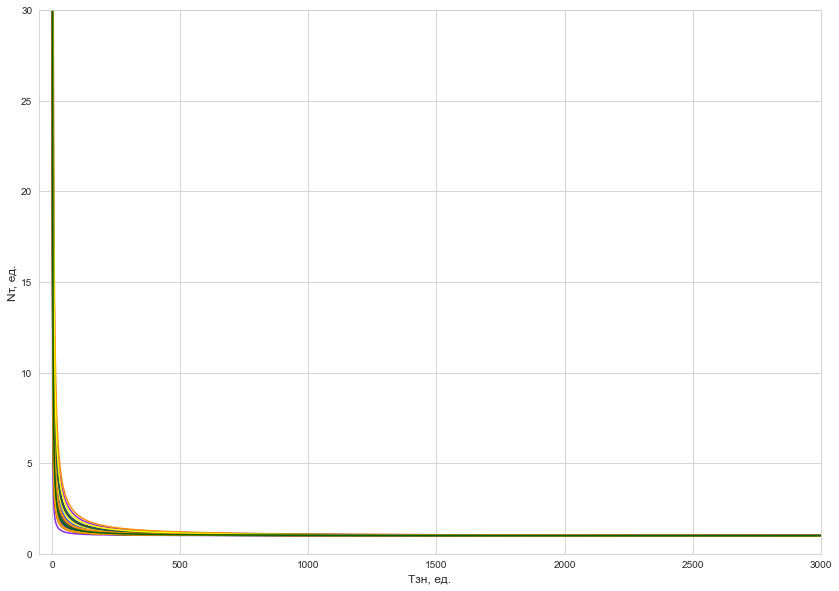

In [9]:
# Крупные пожары по регионам - общий вид диаграммы
R = 3000  # правая граница для графиков

clr = ['mediumorchid', 'blueviolet', 'navy', 'royalblue', 'darkslategrey', 'limegreen', 'darkgreen', 'yellow', 'darkorange', 'orange']

sns.set_style("whitegrid")

fig, ax = plt.subplots(figsize=(14,10))
ax.set_ylim(bottom=0, top=30)  # лимит построения графиков по оси Y
ax.set_xlim(-50, R)  # лимит построения графиков по оси X
ax.set_ylabel('Nт, ед.', size=12)
ax.set_xlabel('Tзн, ед.', size=12)

x = np.arange(0.1, R, 1)

for i in range(40):
    x1, y1 = 1, dTm.Tex['max'][i]
    x2, y2 = dTm.Tm['max'][i], 1
    a, b = koeff_A(x1, y1, x2, y2), koeff_B(x1, y1, x2, y2)

    y = a/x+b
    
    sns.lineplot(x=x, y=y, color = clr[np.random.randint(1, 10)])


fig.savefig('img/hiperbAll-Stv_Tm', dpi=300, bbox_inches = 'tight')

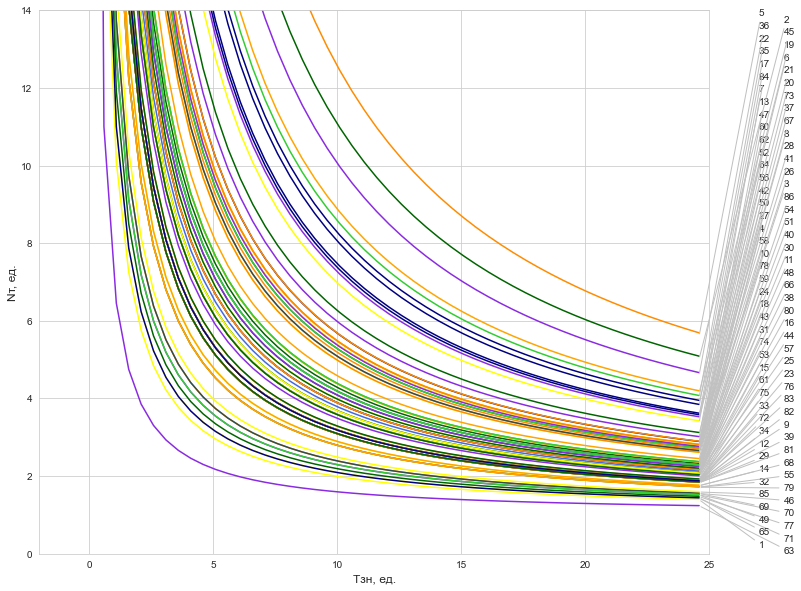

In [11]:
# Крупные пожары по регионам - увеличенный фрагмент

R = 25  # правая граница для графиков
kf_A, kf_B = [],[]
value_Y = np.zeros((86, 3))  # значения Y для подписей графика

sns.set_style("whitegrid")

fig, ax = plt.subplots(figsize=(12,10))
ax.set_ylim(bottom=0, top=14)  # лимит построения графиков по оси Y
ax.set_xlim(-2, R)  # лимит построения графиков по оси X
ax.set_ylabel('Nт, ед.', size=12)
ax.set_xlabel('Tзн, ед.', size=12)

x = np.arange(0.1, R, 0.5)

for i in range(86):
    x1, y1 = 1, dTm.Tex['max'][i]
    x2, y2 = dTm.Tm['max'][i], 1
    a, b = koeff_A(x1, y1, x2, y2), koeff_B(x1, y1, x2, y2)
    kf_A.append(a)
    kf_B.append(b)

    y = a/x+b
    value_Y[i,0] = i+1
    value_Y[i,1] = (a/R + b)
    
    sns.lineplot(x=x, y=y, color = clr[np.random.randint(1, 10)])

# подписи на диаграмме
value_Y = value_Y[np.argsort(value_Y[:,1]), :]
for i in range(86):
    value_Y[i,2] = 0.163 * i #  координата Y для подписей

for i in range(86):

    ax.annotate(int(value_Y[i,0]), xy=(R-0.4, value_Y[i,1]),  xycoords='data',
            xytext=((R + 3 - i%2), value_Y[i,2]), textcoords='data', fontsize=10,
            arrowprops=dict(arrowstyle='-', color='silver') )  
    
fig.savefig('img/hiperb-Stv_Tm', dpi=300, bbox_inches = 'tight')

In [9]:
# Коэффициенты крупных пожаров для регионов
dKF = pd.DataFrame([F.RegionName(i) for i in dTm.Reg], columns = ['Reg'])

dKF['TmNt_A'] = [round(koeff_A(1,dTm.Tex['max'][i], dTm.Tm['max'][i], 1),3) for i in range(86)]
dKF['TmNt_B'] = [round(koeff_B(1,dTm.Tex['max'][i], dTm.Tm['max'][i], 1),3) for i in range(86)]

dKF['TmNstv_A'] = [round(koeff_A(1,dTm.Stv['max'][i], dTm.Tm['max'][i], 1),3) for i in range(86)]
dKF['TmNstv_B'] = [round(koeff_B(1,dTm.Stv['max'][i], dTm.Tm['max'][i], 1),3) for i in range(86)]

dKF['NtNstv_A'] = [round(koeff_A(1,dTm.Stv['max'][i], dTm.Tex['max'][i], 1),3) for i in range(86)]
dKF['NtNstv_B'] = [round(koeff_B(1,dTm.Stv['max'][i], dTm.Tex['max'][i], 1),3) for i in range(86)]

# dKF = dKF.sort_values(by='Reg')  # сортировка выполнена в Excel

dKF.to_excel('dKF.xlsx')


In [84]:
# Регионы, где показатель Tm < 15
dTm1 = dTm.loc[:, (['Tex', 'Reg'], ['max',''])]
dTm1 = dTm1[dTm1.Tex['max']<15]
dTm1 = dTm1.reset_index(drop=True)  # Обновление индексов
for i in range(len(dTm1)):
    print(F.RegionName(dTm1.Reg[i]), '-', dTm1.Tex['max'][i])


Ненецкий авт. округ - 11
респ. Крым - 14
Чукотский авт. округ - 7
респ. Адыгея - 12
респ. Алтай - 14
респ. Калмыкия - 12
КЧР - 13


0 Ненецкий авт. округ 11
1 респ. Крым 14
2 Чукотский авт. округ 7
3 респ. Адыгея 12
4 респ. Алтай 14
5 респ. Калмыкия 12
6 КЧР 13
